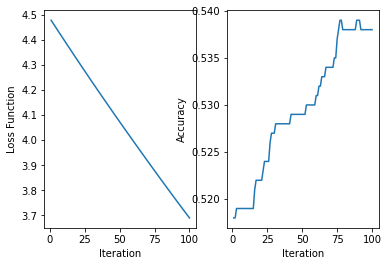

In [50]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1337)
lam = 0.1
n = 1000
d = 100
n_step = 100
step_size = 0.01

# Loss function
def loss(w, x, y, lam) :
    height, width = x.shape
    s = 0
    for i in range(height) :
        s += max(0, 1-y[i] * np.dot(w, x[i]))
    s /= height
    s += lam / 2 * np.linalg.norm(w)
    return s


def accuracy(w, x, y) : 
    height= y.shape[0]
    res = np.sign(np.matmul(x, w))
    correct = sum(np.equal(res, y))
    return correct / height

def subgradient(w, x, y, lam) :
    height= y.shape[0]
    d = w.shape[0]
    
    vec = np.zeros_like(w)
    for i in range(height) :
        xi = x[i]
        yi = y[i]
        if yi * (np.dot(xi,w)) < 1 :
            vec += -yi * xi #sigma(g_i)
    vec /= height # divide by n
        
    g = lam * w  + vec # λW + sigma(g_i)
    return g


X = np.vstack([np.random.normal(0.1, 1, (n//2, d)),
               np.random.normal(-0.1, 1, (n//2, d))])
y = np.hstack([np.ones(n//2), -1*np.ones(n//2)])
w0 = np.random.normal(0, 1, d)

w = w0

step = []
losses = []
accuracies = []

for i in range(n_step) :
    fun_val = loss(w = w, x = X, y = y, lam = lam)
    accur = accuracy(w = w, x = X, y = y)
    step.append(i+1)
    losses.append(fun_val)
    accuracies.append(accur)
    g = subgradient(w, X, y, lam)
    w = w - g * step_size # update

plt.subplot(1, 2, 1)
plt.xlabel("Iteration")
plt.ylabel("Loss Function")
plt.plot(step, losses)

plt.subplot(1, 2, 2)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(step, accuracies)

plt.show()

In [49]:
y = np.hstack([np.ones(n//2), -1*np.ones(n//2)])
w0 = np.random.normal(0, 1, d)
h, w  = X.shape
h

1000

In [19]:
X = np.vstack([np.random.normal(0.1, 1, (n//2, d)),
               np.random.normal(-0.1, 1, (n//2, d))])

In [28]:
sum(np.equal(y, np.sign(np.matmul(X, w0))))

481

In [61]:
vec = np.zeros_like(w0)
vec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Text(0.5, 0, 'func_val')

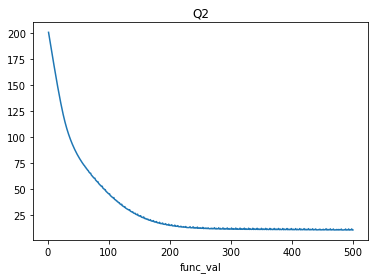

In [49]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
np.random.seed(1337)

n = 5
A = np.random.normal(0, 1, (n, n))
S = A.dot(A.T)

A0 = np.random.normal(0, 1, (n,n))
X0 = A0.dot(A0.T)

num_step = 500
step_size = 0.01
alpha = 0.1

def obj_func(X) :
    ip = np.trace(S.T.dot(X)) # inner product -> sum of traces
    det = np.log(np.linalg.det(X)) # determinant
    norm = alpha * np.sum(np.absolute(X)) # 1-norm of the matrix
    return ip - det + norm

# projection onto PSD cone
# by 1. eigenvalue decomposition of matrix X (as X is PSD)
# assume (lambda)n < 0
# X=∑max{λi,0}vivTi
# https://math.stackexchange.com/questions/2776803/matrix-projection-onto-positive-semi-definite-cone-with-respect-to-the-spectral
def projection(X) :

    e_val, e_vec = np.linalg.eig(X)
    index = e_val.argsort()
    e_vec = e_vec[:,index] # column vector
    e_val = e_val[index]
    
    for i in range(n) : 
        e_val[i] = max(0.0, e_val[i]) #X=∑ni=1max{λi,0}vivTi
    return e_vec.dot(np.diag(e_val)).dot(e_vec.T)

# create a function to compute the gradient
grad_fun = grad(obj_func)

iteration = []
f_val = []
X = X0
for i in range(num_step) :
    f = obj_func(X)
    X -= grad_fun(X) * step_size
    X = projection(X)
    iteration.append(i+1)
    f_val.append(f)

plt.title("Q2")
plt.plot(iteration, f_val)
plt.xlabel("Iteration")
plt.xlabel("func_val")

In [48]:
ev, evec = np.linalg.eig(X0)
print(ev, ev.argsort())
print(evec, evec[:,ev.argsort()] )
ev = ev[ev.argsort()]
ev[0] = 0.0

[13.93536356  6.90251583  0.30274365  1.13533947  2.67453675] [2 3 4 1 0]
[[-0.67094495  0.38726814 -0.27448751  0.56257721 -0.08955308]
 [ 0.48676288  0.45257007  0.03028261  0.38552567  0.63929269]
 [ 0.28640925 -0.14282852 -0.94538031 -0.02997387 -0.05410541]
 [-0.13203515  0.69675928 -0.12507712 -0.69316261  0.0312174 ]
 [-0.46198618 -0.37326965 -0.11979715 -0.23130932  0.76117224]] [[-0.27448751  0.56257721 -0.08955308  0.38726814 -0.67094495]
 [ 0.03028261  0.38552567  0.63929269  0.45257007  0.48676288]
 [-0.94538031 -0.02997387 -0.05410541 -0.14282852  0.28640925]
 [-0.12507712 -0.69316261  0.0312174   0.69675928 -0.13203515]
 [-0.11979715 -0.23130932  0.76117224 -0.37326965 -0.46198618]]
